<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Principal Component Analysis(PCA) with Scaler

This code template is for simple Principal Component Analysis(PCA) along feature scaling via Scale in python for dimensionality reduction technique.   PCA is the simplest of the true eigenvector-based multivariate analyses and is closely related to factor analysis.

### Required Packages

In [1]:
import warnings 
import itertools
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, scale
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features= []

Target feature for prediction.

In [4]:
#y_value
target= ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [6]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [7]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

In [8]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

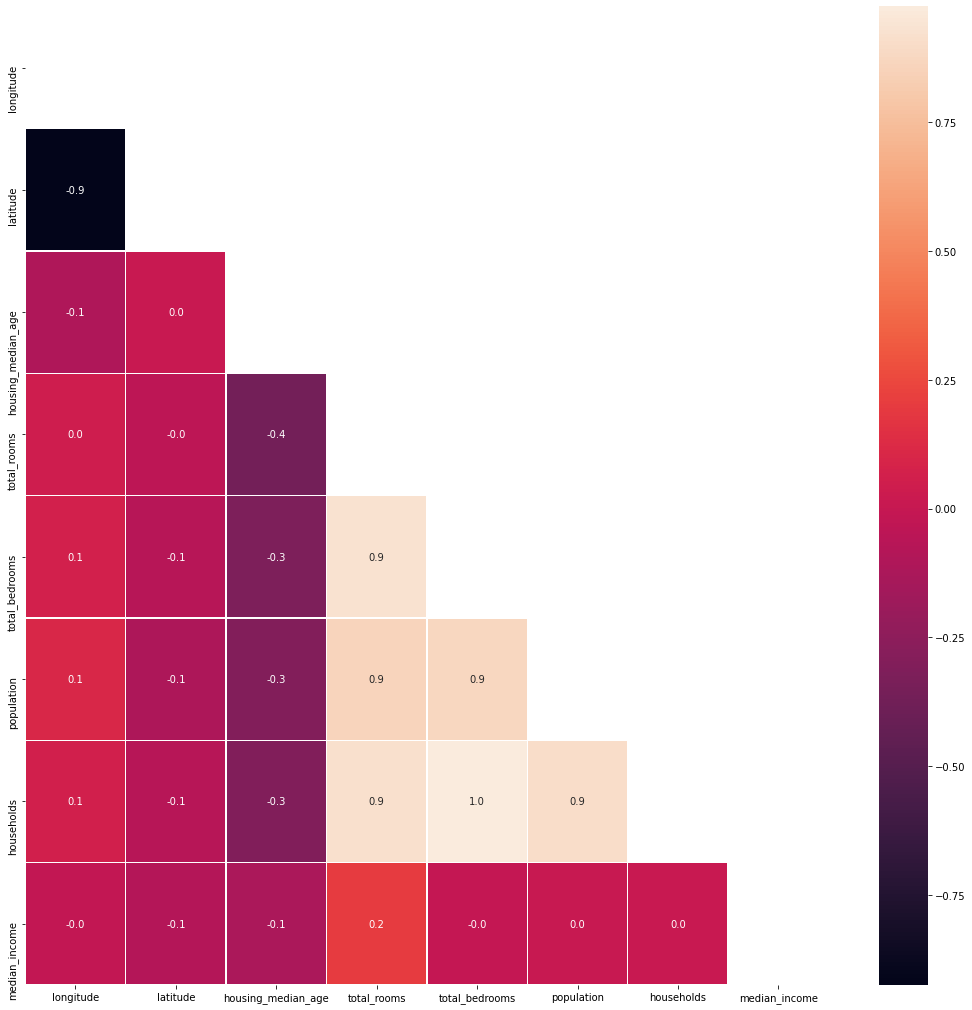

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Rescaling

`Scale` standardizes a dataset along any axis. It standardizes features by removing the mean and scaling to unit variance.

scale is similar to StandardScaler in terms of feature transformation, but unlike StandardScaler, it lacks Transformer API i.e., it does not have fit_transform, transform and other related methods

[**For more Reference**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)

In [10]:
X_Scaled=scale(X)
X_Scaled=pd.DataFrame(data = X_Scaled,columns = X.columns)
X_Scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881


### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

This curve quantifies how much of the total, dimensional variance is contained within the first N components. 

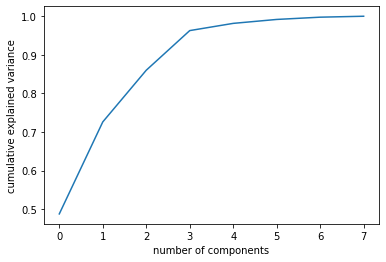

In [11]:
pcaComponents = PCA().fit(X_Scaled)
plt.plot(np.cumsum(pcaComponents.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### Scree plot
The scree plot helps you to determine the optimal number of components. The eigenvalue of each component in the initial solution is plotted. Generally, you want to extract the components on the steep slope. The components on the shallow slope contribute little to the solution. 

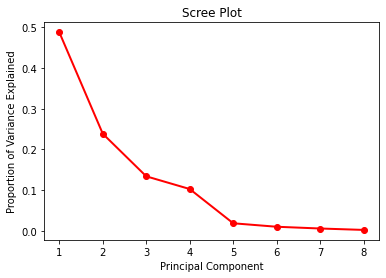

In [12]:
PC_values = np.arange(pcaComponents.n_components_) + 1
plt.plot(PC_values, pcaComponents.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

# Model

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components.

#### Tunning parameters reference : 
[API](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [13]:
pca = PCA(n_components=8)
pcaX = pd.DataFrame(data = pca.fit_transform(X_Scaled))

#### Output Dataframe

In [14]:
finalDf = pd.concat([pcaX, Y], axis = 1)
finalDf.head()

,0,1,2,3,4,5,6,7,median_house_value
0,-2.094402,1.395471,2.049392,1.485851,0.107583,0.147506,0.229908,-0.092903,452600.0
1,2.943439,1.933379,2.150934,0.956663,-0.423140,0.065082,-0.064847,0.260257,358500.0
2,-1.970721,1.464207,1.179892,2.098848,0.020763,-0.038914,0.087208,-0.068673,352100.0
3,-1.920034,1.505871,0.383924,1.764405,-0.007626,0.026096,0.047716,-0.055732,341300.0
4,-1.777657,1.564584,-0.468533,1.414739,-0.159418,-0.052883,-0.148121,-0.000782,342200.0


#### Creator: Vikas Mishra , Github: [Profile](https://github.com/Vikaas08)